# Problem set 3

Alisha Jones

GSS problem set

March 10, 2020 

## 1. Develop hypotheses about two non-linear relationships [1 pt]

You can use the GSS data, Student aid data, or your own data. Develop at least 2 hypotheses about non-linear relationships in your dataset of choice that do the following:

    A. Use the form: The DV will change positive/negatively if the IV changes positively/negatively/categorically (specify what the variables measure and what the categories are if you have a categorical hypothesis)

    B. State if you expect each hypothesized relationship will be linear or take one of the 5 non-linear forms (1. nominal, 2. sequential dummies, 3. splines, 4. quadratic, 5. logarithmic). You tell us at least two different non-linear forms that you think your hypothesized relationships will or will not take.

    C. State your explanation why (theory) you make the predictions in A. and B.

    D. Tell us the source of your data and describe its sample.

In [45]:
A. The DV income will positively change if education changes positively. 
1. I hypothesize that the more education you have the more income you will have. 
2. I hypothesize that college graduates (16 years of education) will have higher income and people with graduate degrees will (20 years of education) have higher income. After high school (12 years) income is going to jump and increse around 16 and 20 years for those who have college and graduate degrees.  

B. I expect that my hypothesis 1 will be a linear relationship. I expect that my hypothesis 2 will have a non-linear relationship. I think that they will take the sequential dummy and quadratic non-linear forms. 

C. I predict that people with college and graduate degrees make more money because if education is positively associated with income. I think that the association will be greater at 16 or more years of education becasue we know that is when people have graduated college and have a graduate degree. 

D. My data comes from the General Social Survey 2018. The sample is nationally representative. 


## 2. Conduct statistical tests for your hypothesized relationship: [3 pts]

* Estimate at least 2 different types of non-linear models that test your hypotheses.

* Use appropriate regression and graphical representations to represent each model.

* Use esttab to compare between types of non-linear and linear models

In [29]:
clear 
set more off 
capture log close using problemset3log.log 
use "GSS2018w7.dta", clear
keep realrinc yearsjob educ age sex race


(75 missing values generated)


  educdummy |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        302       13.29       13.29
         12 |      1,280       56.31       69.60
         16 |        691       30.40      100.00
------------+-----------------------------------
      Total |      2,273      100.00


      Source |       SS           df       MS      Number of obs   =     1,318
-------------+----------------------------------   F(2, 1315)      =     80.12
       Model |  1.1500e+11         2  5.7502e+10   Prob > F        =    0.0000
    Residual |  9.4372e+11     1,315   717658400   R-squared       =    0.1086
-------------+----------------------------------   Adj R-squared   =    0.1073
       Total |  1.0587e+12     1,317   803891266   Root MSE        =     26789

------------------------------------------------------------------------------
    realrinc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-

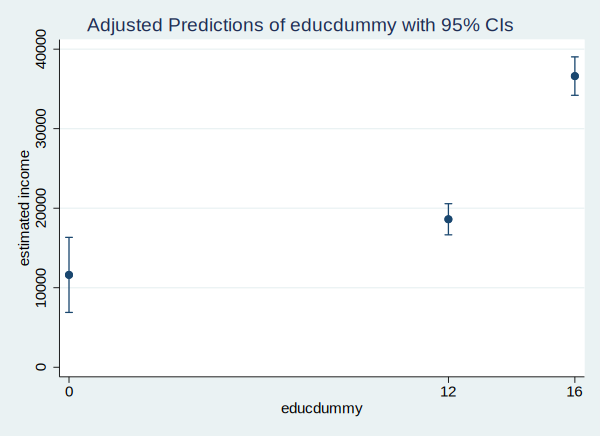

In [30]:
**Non-Linear Model 1**

egen educdummy = cut(educ), at(0,12,16,20)
tab educdummy

xi: reg realrinc ib0.educdummy
margins i.educdummy, atmeans
marginsplot,  unique recast(scatter) ytitle(estimated income)




(3 missing values generated)



--------------------------------------------
                      (1)             (2)   
                 realrinc        realrinc   
                     b/se            b/se   
--------------------------------------------
educ             3121.341***    -1290.009   
                (261.385)      (1304.637)   
educsquared                       165.616***
                                 (47.995)   
_cons          -19105.831***     8814.212   
               (3768.318)      (8919.305)   
--------------------------------------------
R-Sqaured           0.095           0.103   
N                1362.000        1362.000   
--------------------------------------------


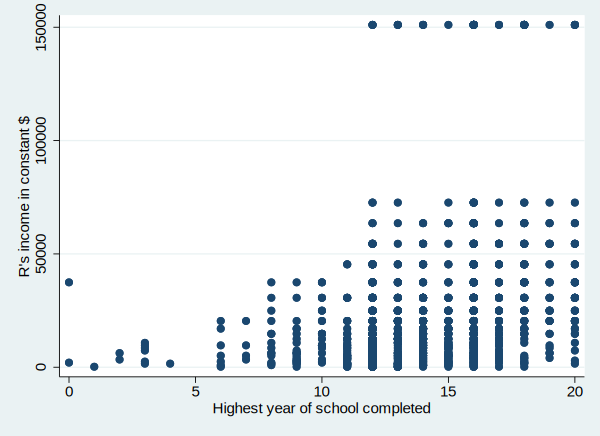

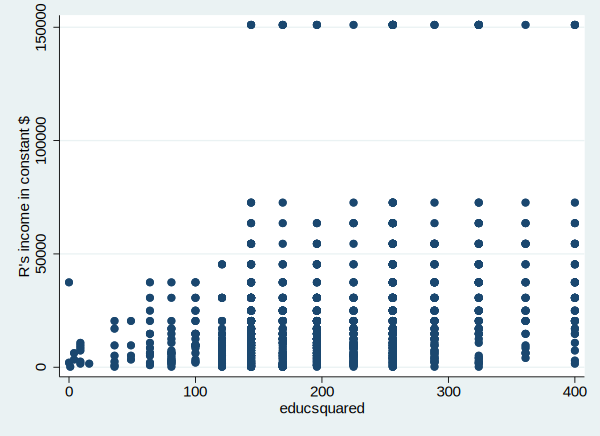

In [31]:
**Non-Linear Model 2**

qui est clear


qui eststo: regress realrinc educ


gen educsquared= educ^2
qui eststo: regress realrinc educ educsquared


esttab, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(3)) ///
se(fmt(3) par)) nobase


twoway (scatter realrinc educ, sort)
twoway (scatter realrinc educsquared, sort)

## 3. Interpret the results [1 pt]

    A. Say whether the results support or contradict your hypothesis and why
    
    B. Say whether a linear or particular non-linear model best describes your data and why

In [ ]:
A. My results support my hypothesis that individuals with a college and graduate degree have higher income than high school graduates. 
B. A non-linear model best describes my data becasue it allows me to see increases in education as more than just being a steady increase in income as education increases. With a non-linear model we were able to see the increases in income at different years of education.